
# PCA from Scratch on MNIST with 3D Visualization

This notebook implements Principal Component Analysis (PCA) *from scratch* (without using `sklearn.decomposition.PCA`) and applies it to a subset of the MNIST dataset. It then visualizes the top 3 components in an interactive 3D scatter using Plotly.

**Sections:**
1. Load and preprocess MNIST  
2. Compute covariance matrix  
3. Eigen decomposition and select top 3 components  
4. Project data onto principal components  
5. Build DataFrame for plotting  
6. 3D visualization with Plotly  


In [13]:

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import silhouette_score

def load_mnist(n_samples=60000, random_state=0):
    """Load MNIST and return a subset of samples and labels."""
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data.astype(np.float64), mnist.target.astype(int)
    np.random.seed(random_state)
    idx = np.random.choice(X.shape[0], n_samples, replace=False)
    X, y = X[idx], y[idx]
    X = StandardScaler().fit_transform(X)
    return X, y

# Load data
X, y = load_mnist(n_samples=60000)
print("Data shape:", X.shape, "Labels shape:", y.shape)


Data shape: (60000, 784) Labels shape: (60000,)


In [14]:

# Step 1: Compute covariance matrix
# Covariance = (X^T X) / (n_samples - 1)
n_samples = X.shape[0]
cov_matrix = np.dot(X.T, X) / (n_samples - 1)
print("Covariance matrix shape:", cov_matrix.shape)


Covariance matrix shape: (784, 784)


In [15]:

# Step 2: Eigen decomposition
# Since covariance matrix is symmetric, use eigh
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx_sorted = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx_sorted]
eigenvectors = eigenvectors[:, idx_sorted]

print("Top 5 eigenvalues:", eigenvalues[:5])


Top 5 eigenvalues: [40.58843772 28.99028929 26.92599015 20.70328849 18.13196324]


In [16]:

# Step 3: Select top 2 principal components
n_components = 2
components = eigenvectors[:, :n_components]  # shape (784,3)
print("Components shape:", components.shape)

# Project data onto principal components
X_pca = np.dot(X, components)
print("Projected data shape:", X_pca.shape)


Components shape: (784, 2)
Projected data shape: (60000, 2)


In [17]:
# --- PCA projection ---
t0 = time.time()
X_pca = np.dot(X, components)             # (n_samples, k)
t1 = time.time()
print(f"PCA runtime: {t1-t0:.3f}s")

# Silhouette
score_pca = silhouette_score(X_pca, y, metric='euclidean')
print(f"PCA Silhouette Score: {score_pca:.4f}")

# Reconstruction error
X_recon = X_pca @ components.T
mse = np.mean((X - X_recon)**2)
print(f"PCA Reconstruction MSE: {mse:.4f}")

PCA runtime: 0.060s
PCA Silhouette Score: -0.0617
PCA Reconstruction MSE: 0.8271


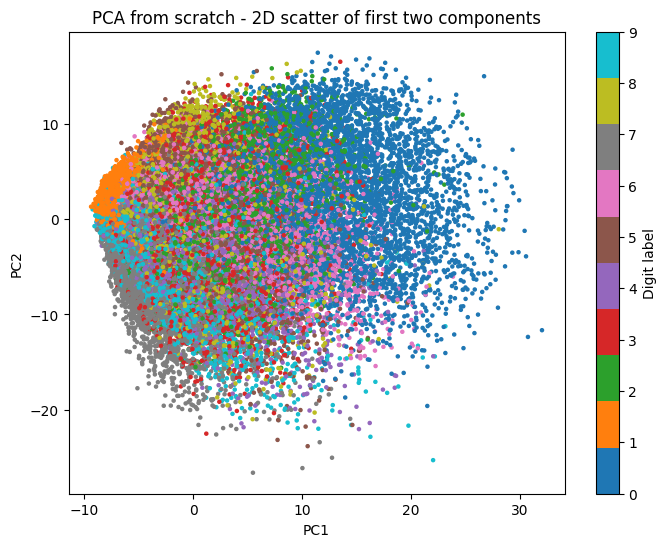

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=5)
plt.title("PCA from scratch - 2D scatter of first two components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Digit label')
plt.show()

In [19]:

# Step 3: Select top 3 principal components
n_components = 3
components = eigenvectors[:, :n_components]  # shape (784,3)
print("Components shape:", components.shape)

# Project data onto principal components
X_pca = np.dot(X, components)
print("Projected data shape:", X_pca.shape)


Components shape: (784, 3)
Projected data shape: (60000, 3)


In [20]:
# --- PCA projection ---
t0 = time.time()
X_pca = np.dot(X, components)             # (n_samples, k)
t1 = time.time()
print(f"PCA runtime: {t1-t0:.3f}s")

# Silhouette
score_pca = silhouette_score(X_pca, y, metric='euclidean')
print(f"PCA Silhouette Score: {score_pca:.4f}")

# Reconstruction error
X_recon = X_pca @ components.T
mse = np.mean((X - X_recon)**2)
print(f"PCA Reconstruction MSE: {mse:.4f}")

PCA runtime: 0.082s
PCA Silhouette Score: 0.0038
PCA Reconstruction MSE: 0.7927


In [21]:

import pandas as pd

# Build DataFrame for Plotly
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'label': y
})
df_pca.head()


,PC1,PC2,PC3,label
0,9.384556,-0.782819,0.943242,0
1,-1.917130,-3.609685,-3.132931,4
2,-7.828837,-0.693746,0.990820,1
3,2.056503,5.940937,1.904988,2
4,-0.243876,-5.269743,-3.523592,7


In [22]:

import plotly.express as px

# 3D scatter plot
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='label',
    title='PCA (from scratch) 3D Embedding of MNIST',
    labels={'PC1':'Principal Component 1','PC2':'Principal Component 2','PC3':'Principal Component 3'},
    width=800, height=600
)
fig.update_traces(marker=dict(size=3))
fig.show()

In [ ]:
start = time.time()
X_pca_50, _, _ = pca_from_scratch(X_pca, 50)
X_tsne_hybrid = TSNE(n_components=2).fit_transform(X_pca_50)
hybrid_time = time.time() - start
sil_hybrid = silhouette_score(X_tsne_hybrid, y)